# Projet analyse de données

## Consignes:
Votre analyse sous forme de Jupyter Notebook déposé sur votre git en PUBLIC devra contenir:
* Une problématique pertinente (c-à-d ou il est possible de répondre avec des données)
* Au moins 1 diagramme avec données continues, type nuage de point ou histogramme
* Au moins 2 diagrammes avec des données discrètes
* Au moins 3 graphiques avec des données catégoriques
* 1 boîte à moustaches avec filtrage des données aberrantes sur le dataset (si il y en a)
* 1 heat map avec matrice de corrélation (si pertinent)
* Des commentaires clairs et pertinents pour chaque graphiques

## Problématique:

**Est-ce que le genre et/ou l'âge influent sur les performances de l'athlète ?**

### Import des données

In [5]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [6]:
games2019_athletes = pd.read_csv('/content/drive/MyDrive/Hitema/Datasets/crossfit-games-data/2019_games_athletes.csv')

### Analyse des composantes et nettoyage des données

In [7]:
games2019_athletes

,height,affiliateid,countryoforiginname,weight,affiliatename,status,bibid,profilepics3key,competitorid,firstname,gender,age,lastname,countryoforigincode,competitorname,overallrank,overallscore,division
0,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,016,9e218-P153604_4-184.jpg,153604,Mathew,M,29,Fraser,US,Mathew Fraser,1,984.0,Men
1,1.74,44800.0,United States,86.2,Peak 360 CrossFit,ACT,302,0a0bc-P2725_5-184.jpg,2725,Noah,M,28,Ohlsen,US,Noah Ohlsen,2,949.0,Men
2,1.55,44753.0,Iceland,83.9,CrossFit Hengill,ACT,122,4c5dc-P81616_4-184.jpg,81616,Björgvin Karl,M,26,Guðmundsson,IS,Björgvin Karl Guðmundsson,3,888.0,Men
3,1.80,44597.0,United States,84.8,CrossFit Mentality,ACT,105,e23e0-P34796_8-184.jpg,34796,Scott,M,31,Panchik,US,Scott Panchik,4,795.0,Men
4,1.55,44792.0,Australia,87.1,CrossFit Mode,ACT,303,b7c6d-P16080_7-184.jpg,16080,James,M,28,Newbury,AU,James Newbury,5,728.0,Men
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,1.65,44947.0,United States,71.2,CrossFit Uncommon,ACT,610,433bb-P198927_3-184.jpg,198927,Julie,X,62,Holt,US,Julie Holt,6,380.0,Women (60+)
390,1.62,44856.0,United States,53.1,Reebok CrossFit Medfield,ACT,605,a6012-P312883_7-184.jpg,312883,Carol Lynn,X,62,Thistle,US,Carol Lynn Thistle,7,310.0,Women (60+)
391,1.25,44782.0,United States,50.8,Ft. Wright CrossFit,ACT,607,0b3ce-P32842_4-184.jpg,32842,Elizabeth,X,62,Cole,US,Elizabeth Cole,8,290.0,Women (60+)
392,1.68,44821.0,Canada,57.2,CrossFit Living The Dream Ajax,ACT,606,10f1f-P702085_9-184.jpg,702085,Christine,X,60,Long,CA,Christine Long,9,250.0,Women (60+)


Le jeu de données étudié contient un échantillon de 394 individus présentés en fonction de 18 propriétés.

In [8]:
games2019_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   height               394 non-null    float64
 1   affiliateid          357 non-null    float64
 2   countryoforiginname  394 non-null    object 
 3   weight               394 non-null    float64
 4   affiliatename        357 non-null    object 
 5   status               394 non-null    object 
 6   bibid                394 non-null    object 
 7   profilepics3key      394 non-null    object 
 8   competitorid         394 non-null    int64  
 9   firstname            394 non-null    object 
 10  gender               394 non-null    object 
 11  age                  394 non-null    int64  
 12  lastname             394 non-null    object 
 13  countryoforigincode  393 non-null    object 
 14  competitorname       394 non-null    object 
 15  overallrank          394 non-null    obj

En observant les composantes du jeu de données, on remarque que :
* Les principales caractéristiques que l'on va pouvoir étudier pour essayer de répondre à la problématique sont l'âge et le genre des athlètes. On peut également s'intéresser aux caractéristiques physiques que sont le poids et la taille.

* Certaines valeur réapparaissent plusieurs fois et sont communes à plusieurs athlètes. Elles permettent de les regrouper et d'établir des catégories notamment selon le pays d'origine, le statut, le genre, et la division. Parmi ces catégories, ce sont le genre et la division qui nous intéressent pour nous aider à apporter une réponse.

In [9]:
gender = games2019_athletes.gender.unique()
division = games2019_athletes.division.unique()
print('Genre = {}\n\nDivision = {}'.format( gender, division))

Genre = ['M' 'F' 'X']

Division = ['Men' 'Women' 'Men (35-39)' 'Women (35-39)' 'Men (40-44)' 'Women (40-44)'
 'Men (45-49)' 'Women (45-49)' 'Men (50-54)' 'Women (50-54)' 'Men (55-59)'
 'Women (55-59)' 'Men (60+)' 'Women (60+)']


Pour la suite on gardera uniquement les composantes citées précédemment.

In [10]:
#games2019_athletes_filtered = games2019_athletes.loc[games2019_athletes['division'].isin(['Men', 'Women']), ['competitorid', 'height', 'weight', 'gender', 'age', 'overallscore']]
games2019_athletes_filtered = games2019_athletes.loc[:, ['division', 'age', 'gender', 'height', 'weight', 'overallscore']]
games2019_athletes_filtered

,division,age,gender,height,weight,overallscore
0,Men,29,M,1.74,88.5,984.0
1,Men,28,M,1.74,86.2,949.0
2,Men,26,M,1.55,83.9,888.0
3,Men,31,M,1.80,84.8,795.0
4,Men,28,M,1.55,87.1,728.0
...,...,...,...,...,...,...
389,Women (60+),62,X,1.65,71.2,380.0
390,Women (60+),62,X,1.62,53.1,310.0
391,Women (60+),62,X,1.25,50.8,290.0
392,Women (60+),60,X,1.68,57.2,250.0


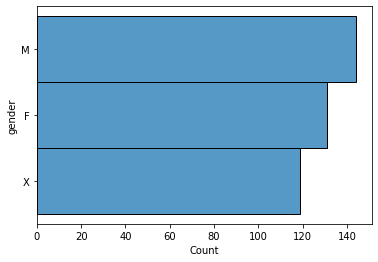

In [11]:
#games2019_athletes.groupby('gender').size()
sb.histplot(data=games2019_athletes_filtered, y='gender')

On voit aussi dans la liste des genres la présence d'une valeur 'X' en très grand nombre.

In [12]:
games2019_athletes_filtered.loc[games2019_athletes_filtered.division.str.contains('Men', case=True), 'gender'] = 'M'
games2019_athletes_filtered.loc[games2019_athletes_filtered.division.str.contains('Women', case=True), 'gender'] = 'W'

Afin d'avoir une cohérence, on attribue un genre aux individus pour qui il n'est pas défini (ayant pour valeur 'X') selon les divisions dans lesquels ils se trouvent.

In [13]:
games2019_athletes_filtered['gender'] = games2019_athletes_filtered['gender'].replace(['M','W'],[0,1])

Et on remplace les valeurs des genres par 0 pour Men et 1 pour Women afin de faciliter leur prise en compte dans les statistiques et de travailler plus facilement avec.

In [14]:
games2019_athletes_filtered

,division,age,gender,height,weight,overallscore
0,Men,29,0,1.74,88.5,984.0
1,Men,28,0,1.74,86.2,949.0
2,Men,26,0,1.55,83.9,888.0
3,Men,31,0,1.80,84.8,795.0
4,Men,28,0,1.55,87.1,728.0
...,...,...,...,...,...,...
389,Women (60+),62,1,1.65,71.2,380.0
390,Women (60+),62,1,1.62,53.1,310.0
391,Women (60+),62,1,1.25,50.8,290.0
392,Women (60+),60,1,1.68,57.2,250.0


In [16]:
games2019_athletes_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   division      394 non-null    object 
 1   age           394 non-null    int64  
 2   gender        394 non-null    int64  
 3   height        394 non-null    float64
 4   weight        394 non-null    float64
 5   overallscore  391 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 18.6+ KB


On va donc travailler avec un jeu de données qui présente 6 propriétés pour le même nombre d'individus.

### Analyse des données

1.   Corrélation entre les différentes propriétés

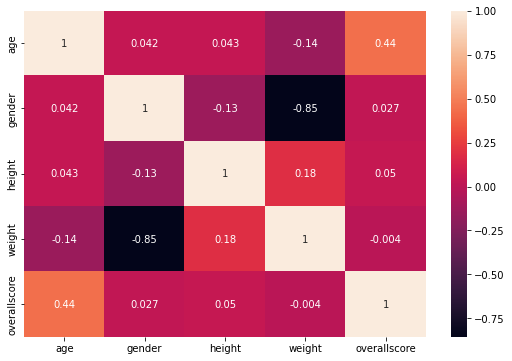

In [18]:
matrice_games = games2019_athletes_filtered.corr()
plt.figure(figsize= (9,6))
sb.heatmap(data=matrice_games, annot=True)

La heatmap permet de mettre en évidence que la plus forte corélation se fait entre l'âge et le score. Le genre présente une corélation beaucoup moins élevée mais toujours plus importante que la taille et le poids qui sont quasiment nulle voir négative.

2.   L'âge

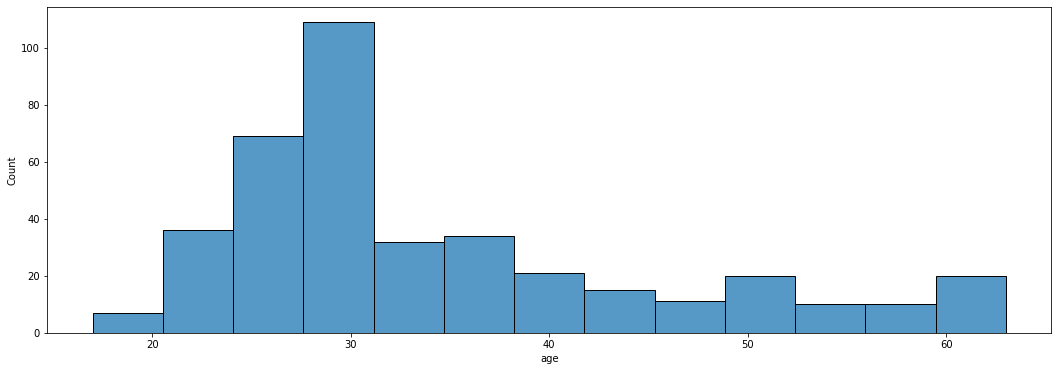

In [19]:
plt.figure(figsize= (18,6))
sb.histplot(data=games2019_athletes_filtered, x="age")

La distribution des athlètes par âge montre clairement que le nombre de participants diminue fortement au delà de 35-40 ans.

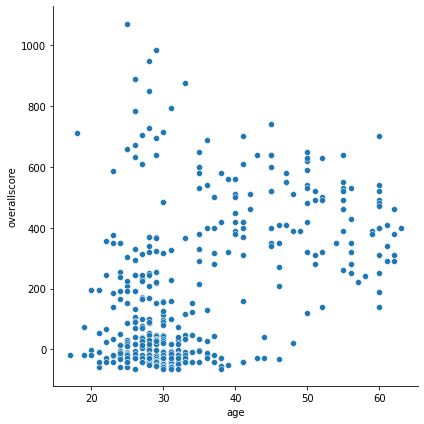

In [44]:
sb.relplot(data=games2019_athletes_filtered, x="age", y="overallscore", height=6)

In [41]:
#games2019_athletes.groupby('division').size()

In [43]:
#plt.figure(figsize= (18,6))
#sb.histplot(data=games2019_athletes_filtered, x="division")

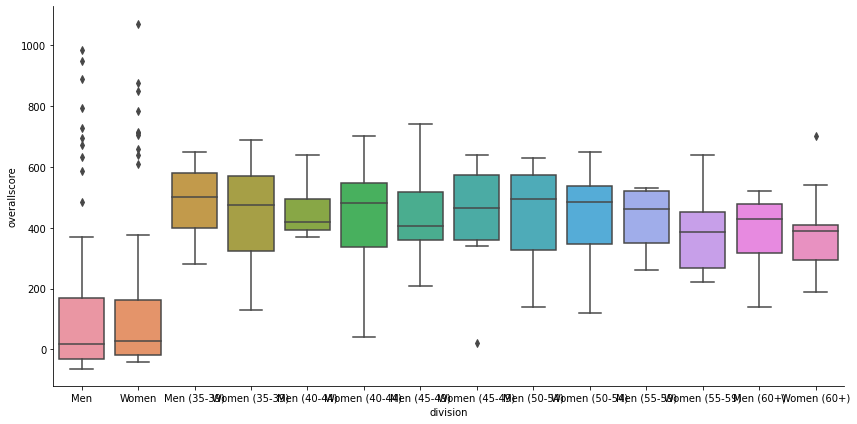

In [27]:
sb.catplot(data=games2019_athletes_filtered, x="division", y="overallscore", kind="box", height=6, aspect=2)

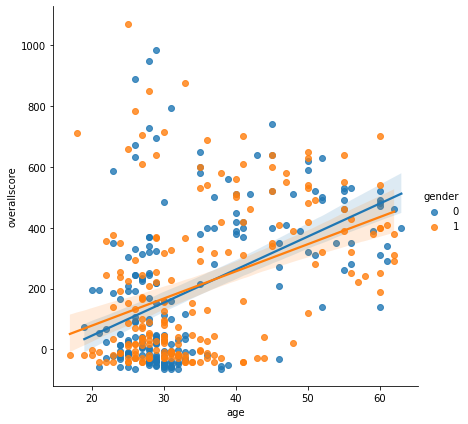

In [39]:
sb.lmplot(data=games2019_athletes_filtered, x="age", y="overallscore", hue="gender", height=6)

3.   Le genre

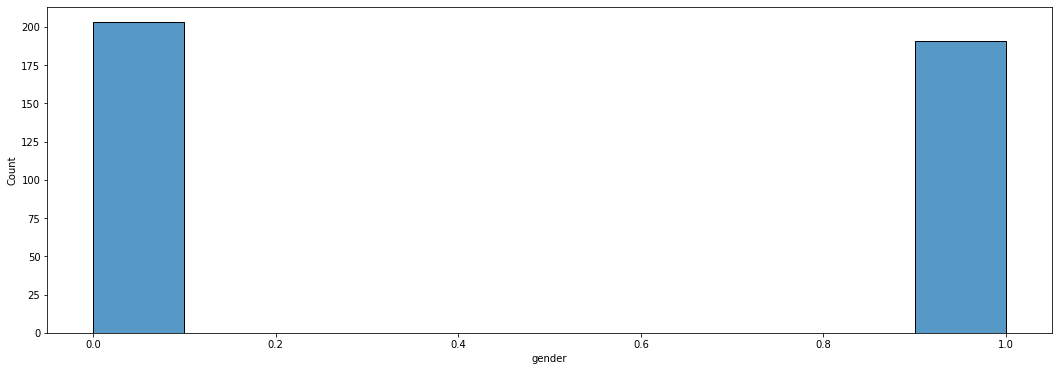

In [22]:
plt.figure(figsize= (18,6))
sb.histplot(data=games2019_athletes_filtered, x="gender")

La distribution des athlètes par genre montre en revanche une répartition presque identique entre les athlètes hommes et femme.

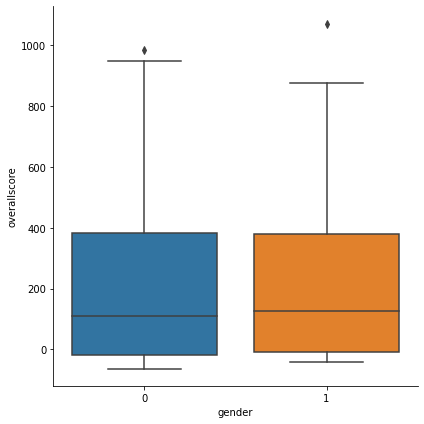

In [23]:
sb.catplot(data=games2019_athletes_filtered, x="gender", y="overallscore", kind="box", height=6)

In [34]:
games2019_athletes_filtered.groupby('gender').overallscore.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,200.0,198.170000,246.628647,-63.0,-17.25,110.0,382.5,984.0
1,191.0,211.691099,249.065123,-42.0,-8.50,125.0,380.0,1071.0


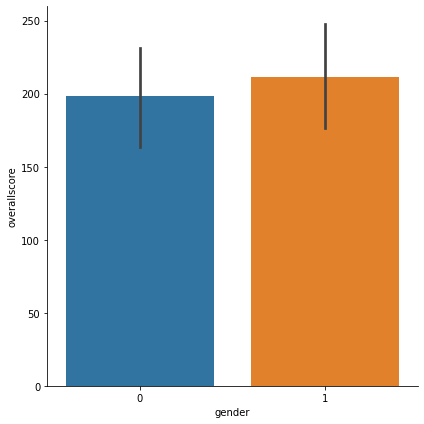

In [24]:
sb.catplot(data=games2019_athletes_filtered, x="gender", y="overallscore", kind="bar", height=6)

## Conclusion :

Bien que les éléments étudiés permettent de montrer une tendance sur l'équilibre des performances entre les hommes et les femmes, ce n'est pas aussi évident en ce qui concerne la relation entre l'âge et la performance des athlètes quelque soit leur genre.

Il faut aussi souligner qu'un échantillon de 394 individus reste insuffisant pour établir de réelles statistiques. Il serait donc préférable de refaire une étude avec un jeu de données contenant un nombre beaucoup plus élevé d'individus.

Le présent jeu de données ne permet donc pas de répondre à la problématique de façon satisfaisante.

*Fact*

Les charges Rx des athlètes ont été augmentées il y a deux ans, car celles des femmes n'étaient plus assez élevées. Les charges sont passées de :
* 17,5kg à 22,5kg pour les femmes
* 22,5kg à 30kg pour les hommes